# Import

In [1]:
# data
import numpy as np
from sklearn.datasets import make_blobs, make_circles

# preprocess
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

# model
from sklearn.linear_model import LogisticRegression, Perceptron

# evaluation
from sklearn.model_selection import cross_val_score

# plot
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from distutils.version import LooseVersion

# Define plot_decision_regions function
https://github.com/rasbt/python-machine-learning-book-3rd-edition/blob/master/ch03/ch03.ipynb

In [2]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    color=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        
        if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')
        else:
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='none',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')

# Define plot_decision_regions2 function

In [3]:
def plot_decision_regions2(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    # modified part
    Z = np.array([xx1.ravel(), xx2.ravel()]).T
    Z_new = poly.fit_transform(Z)
    Z_pred = classifier.predict(Z_new)
    
    
    Z = Z_pred.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    color=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        
        if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')
        else:
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='none',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')       

# Define trainning_perceptron function
利用多次實驗進行交叉驗證，選擇最適合建立 perceptron 的參數組合。  
本次以調整eta0作為範例。  
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html

In [4]:
def trainning_perceptron(X_train, y_train):
    
    # Tuning parameter of Perceptron
    eta0s = [1, 0.1, 0.01, 0.001, 0.0001]
    cv_scores = []

    for eta0 in eta0s:
        ppn = Perceptron(eta0=eta0, random_state=1)
        scores = cross_val_score(ppn, X_train, y_train, cv=10, scoring='accuracy')
        cv_scores.append(scores.mean())

    optimal_eta0 = eta0s[cv_scores.index(max(cv_scores))]

    # modeling Perceptron
    ppn = Perceptron(eta0=optimal_eta0, random_state=1)
    ppn.fit(X_train, y_train)
    
    return ppn

# Define trainning_LogisticRegression function
利用多次實驗進行交叉驗證，選擇最適合建立 Logistic Regression 的參數組合。  
本次以調整C作為範例。  
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression

In [5]:
def trainning_LogisticRegression(X_train, y_train):
    
    # Tuning parameter of LogisticRegression
    Cs = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
    cv_scores = []

    for C in Cs:
        lr = LogisticRegression(C=C, random_state=1, 
                                solver='lbfgs', multi_class='ovr')
        scores = cross_val_score(lr, X_train, y_train, cv=10, scoring='accuracy')
        cv_scores.append(scores.mean())

    optimal_C = Cs[cv_scores.index(max(cv_scores))]

    # modeling LogisticRegression
    lr = LogisticRegression(C=optimal_C, random_state=1, solver='lbfgs', multi_class='ovr')
    lr.fit(X_train, y_train)
    
    return lr

## Blobs

In [6]:
# load data
X, y = make_blobs(n_samples=500, cluster_std=2, random_state=2)

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# get model
ppn = trainning_perceptron(X_train, y_train)
print('Perceptron:', ppn.score(X_test, y_test))
lr = trainning_LogisticRegression(X_train, y_train)
print('Logistic Regression:', lr.score(X_test, y_test))

Perceptron: 0.6933333333333334
Logistic Regression: 0.7866666666666666


<ipython-input-2-ee59ea80015c>:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


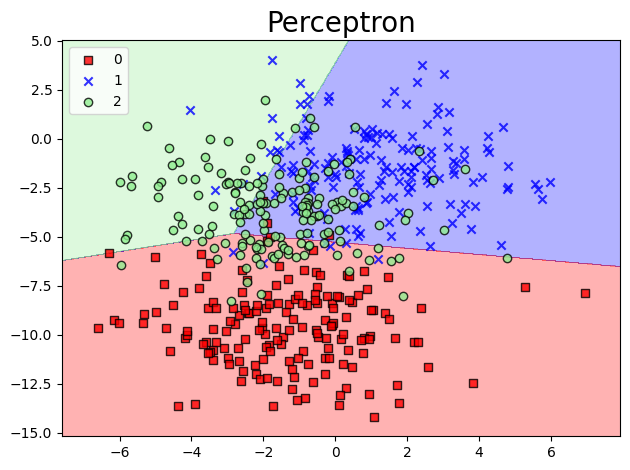

In [7]:
# plot decision regions
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined, y=y_combined, classifier=ppn)

plt.legend(loc='upper left')
plt.title('Perceptron', fontsize=20)

plt.tight_layout()
plt.show()

<ipython-input-2-ee59ea80015c>:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


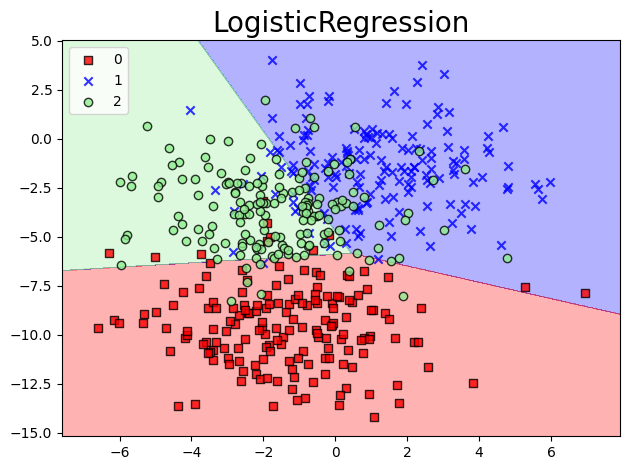

In [8]:
# plot decision regions
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined, y=y_combined, classifier=lr)

plt.legend(loc='upper left')
plt.title('LogisticRegression', fontsize=20)

plt.tight_layout()
plt.show()

# Circle

In [9]:
# load data
X, y = make_circles(n_samples = 500, noise = 0.1, random_state = 2)

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# get model
ppn = trainning_perceptron(X_train, y_train)
print('Perceptron:', ppn.score(X_test, y_test))
lr = trainning_LogisticRegression(X_train, y_train)
print('Logistic Regression:', lr.score(X_test, y_test))

Perceptron: 0.47333333333333333
Logistic Regression: 0.46


<ipython-input-2-ee59ea80015c>:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


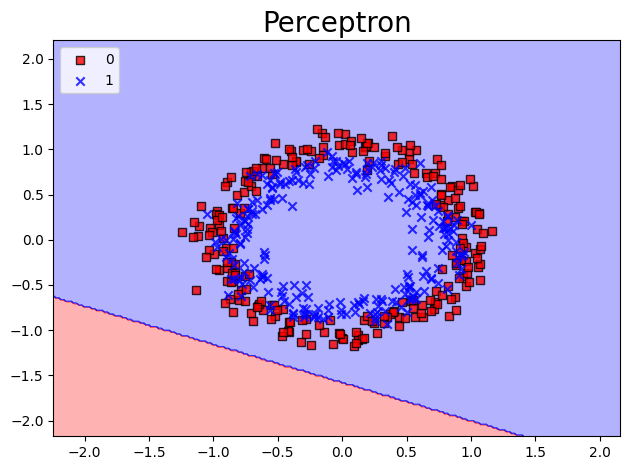

In [10]:
# plot decision regions
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined, y=y_combined, classifier=ppn)

plt.legend(loc='upper left')
plt.title('Perceptron', fontsize=20)

plt.tight_layout()
plt.show()

<ipython-input-2-ee59ea80015c>:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


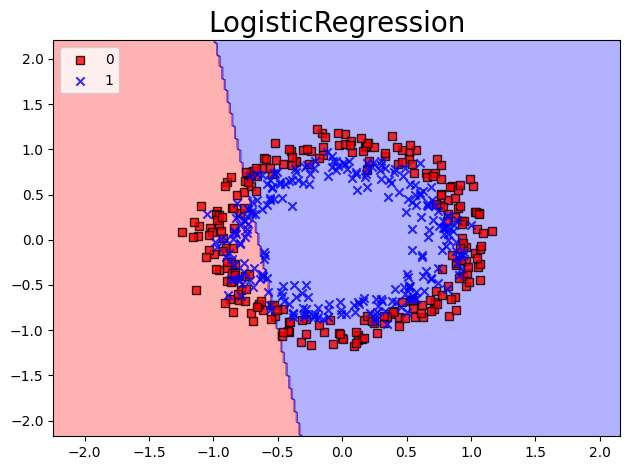

In [11]:
# plot decision regions
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined, y=y_combined, classifier=lr)

plt.legend(loc='upper left')
plt.title('LogisticRegression', fontsize=20)

plt.tight_layout()
plt.show()

直接使用跟Blobs資料集一樣的訓練方式會發現，決策區域圖無法繪製的很好，都只能切直線。  
因此添加二次項，並修改繪製決策區域圖的方法，即可得到適合之決策區域圖。  
https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=&seed=0.58512&showTestData=false&discretize=false&percTrainData=30&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false  
除了添加二次項之外，同學們也可以參考上面的網站，試著增加其他特徵也是可以讓決策區域圖畫出曲線的！

In [12]:
# 二次項
poly = PolynomialFeatures(degree = 2)
X_train_new = poly.fit_transform(X_train)
X_test_new = poly.fit_transform(X_test)

# get model
ppn = trainning_perceptron(X_train_new, y_train)
print('Perceptron:', ppn.score(X_test_new, y_test))
lr = trainning_LogisticRegression(X_train_new, y_train)
print('Logistic Regression:', lr.score(X_test_new, y_test))

Perceptron: 0.8066666666666666
Logistic Regression: 0.86


In [13]:
# plot decision regions
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined, y=y_combined, classifier=ppn)

plt.legend(loc='upper left')
plt.title('Perceptron', fontsize=20)

plt.tight_layout()
plt.show()

ValueError: ignored

添加二次項之後，如直接使用原本繪製決策區域圖的方法plot_decision_regions，會發生錯誤。  
觀測錯誤碼可以發現，因為特徵值增加了所以使用原本的繪圖方式會有錯誤，因此需要調整繪製的方法。  
下方使用調整完的決策區域圖繪製方法plot_decision_regions2進行繪製。

<ipython-input-3-88173166261c>:26: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


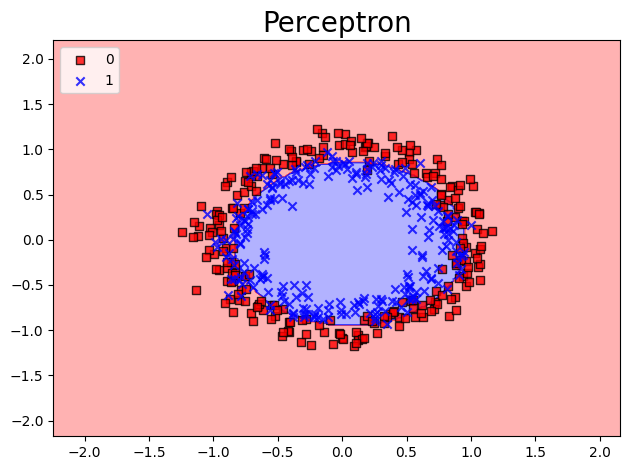

In [14]:
# plot decision regions
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions2(X=X_combined, y=y_combined, classifier=ppn)

plt.legend(loc='upper left')
plt.title('Perceptron', fontsize=20)

plt.tight_layout()
plt.show()

<ipython-input-3-88173166261c>:26: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


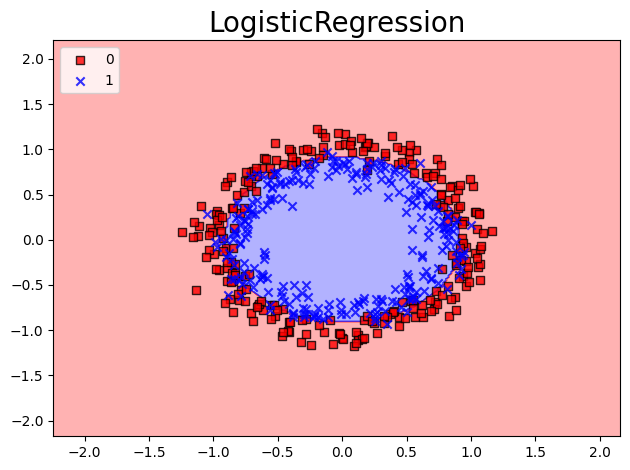

In [15]:
# plot decision regions
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions2(X=X_combined, y=y_combined, classifier=lr)

plt.legend(loc='upper left')
plt.title('LogisticRegression', fontsize=20)

plt.tight_layout()
plt.show()

# 用MLP來做

In [16]:
#MLP(一層隱藏層)
import tensorflow
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot as plt

model = Sequential()
model.add(Dense(4, activation='sigmoid', input_shape=(X_train_new.shape[1],)))#原本是2
model.add(Dense(2, activation='sigmoid'))
model.add(Dense(2, activation='softmax'))
model.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=0.08), metrics=['accuracy'])
model.fit(X_train_new, y_train, batch_size=10, epochs=50, verbose=1, validation_data=(X_test_new, y_test))

Epoch 1/50
35/35 [==============================] - 1s 8ms/step - loss: 0.2733 - accuracy: 0.5114 - val_loss: 0.2580 - val_accuracy: 0.4733
Epoch 2/50
35/35 [==============================] - 0s 3ms/step - loss: 0.2537 - accuracy: 0.5114 - val_loss: 0.2512 - val_accuracy: 0.4733
Epoch 3/50
35/35 [==============================] - 0s 4ms/step - loss: 0.2506 - accuracy: 0.5143 - val_loss: 0.2502 - val_accuracy: 0.5467
Epoch 4/50
35/35 [==============================] - 0s 3ms/step - loss: 0.2502 - accuracy: 0.5257 - val_loss: 0.2501 - val_accuracy: 0.5133
Epoch 5/50
35/35 [==============================] - 0s 3ms/step - loss: 0.2501 - accuracy: 0.4714 - val_loss: 0.2501 - val_accuracy: 0.4467
Epoch 6/50
35/35 [==============================] - 0s 3ms/step - loss: 0.2501 - accuracy: 0.4657 - val_loss: 0.2501 - val_accuracy: 0.4467
Epoch 7/50
35/35 [==============================] - 0s 3ms/step - loss: 0.2501 - accuracy: 0.4600 - val_loss: 0.2501 - val_accuracy: 0.4400
Epoch 8/50
35/35 [==

In [22]:
def plot_decision_regions3(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    # modified part   
    Z = np.array([xx1.ravel(), xx2.ravel()]).T
    Z_new = poly.fit_transform(Z)
    Z_pred = classifier.predict(Z_new)
    Z_pred = np.argmax(Z_pred, axis=1) #新增了這條，因為多元分類要取最大可能性的
    
    Z = Z_pred.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    color=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        
        if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')
        else:
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='none',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')       

1520/1520 [==============================] - 2s 1ms/step


<ipython-input-22-7ae174c9d09a>:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


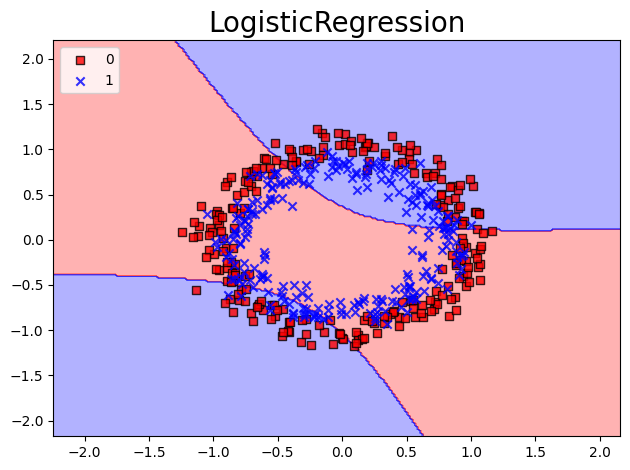

In [23]:
# plot decision regions
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions3(X=X_combined, y=y_combined, classifier=model)

plt.legend(loc='upper left')
plt.title('LogisticRegression', fontsize=20)

plt.tight_layout()
plt.show()

In [24]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

mlp = MLPClassifier(hidden_layer_sizes=(1,), max_iter=1000, alpha=1e-4,
            solver='sgd', verbose=10, tol=1e-4, random_state=1,
            learning_rate_init=.1)
mlp.fit(X_train_new, y_train)

Iteration 1, loss = 0.71232057
Iteration 2, loss = 0.70769876
Iteration 3, loss = 0.70243154
Iteration 4, loss = 0.69747052
Iteration 5, loss = 0.69412114
Iteration 6, loss = 0.69286558
Iteration 7, loss = 0.69304082
Iteration 8, loss = 0.69315183
Iteration 9, loss = 0.69436252
Iteration 10, loss = 0.69431152
Iteration 11, loss = 0.69414141
Iteration 12, loss = 0.69382858
Iteration 13, loss = 0.69343371
Iteration 14, loss = 0.69295953
Iteration 15, loss = 0.69260543
Iteration 16, loss = 0.69281395
Iteration 17, loss = 0.69219039
Iteration 18, loss = 0.69198972
Iteration 19, loss = 0.69175046
Iteration 20, loss = 0.69154441
Iteration 21, loss = 0.69157606
Iteration 22, loss = 0.69155348
Iteration 23, loss = 0.69159286
Iteration 24, loss = 0.69146643
Iteration 25, loss = 0.69137193
Iteration 26, loss = 0.69132528
Iteration 27, loss = 0.69125528
Iteration 28, loss = 0.69120318
Iteration 29, loss = 0.69130404
Iteration 30, loss = 0.69109055
Iteration 31, loss = 0.69101448
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(1,), learning_rate_init=0.1, max_iter=1000,
              random_state=1, solver='sgd', verbose=10)

<ipython-input-3-88173166261c>:26: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


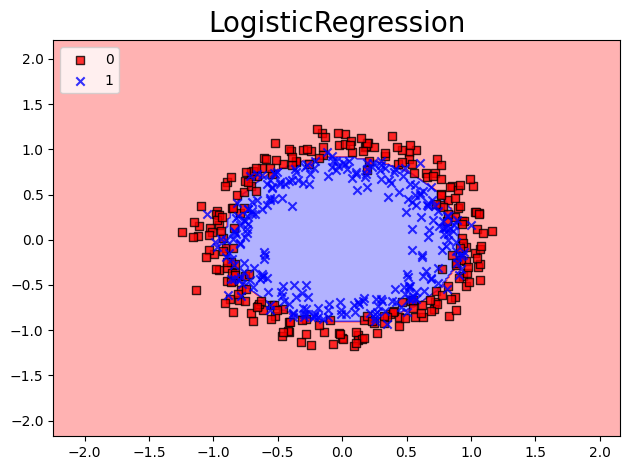

In [25]:
# plot decision regions
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions2(X=X_combined, y=y_combined, classifier=mlp)

plt.legend(loc='upper left')
plt.title('LogisticRegression', fontsize=20)

plt.tight_layout()
plt.show()